# Exercise 1: Working with Geometric Objects

This week we will practice how to create geometric objects using Shapely module and how to find out different useful attributes from those geometries. We will take advantage of what we have learned earlier, specifically functions, that you should use for making different GIS operations easier to use in the future. We will also use Pandas to read data from a file.

- **Exercise 1 is due by Wednesday 7.11 before the next practical session**.

- Don't forget to check out the [hints for this week's exercise](https://automating-gis-processes.github.io/2018/lessons/L1/exercise-1.html) if you're having trouble.

- Scores on this exercise are out of **20 points**.

## Problem 1: Creating basic geometries (*5 points*)


1: Create a function called `create_point_geom()` that has two parameters (x_coord, y_coord). Function should create a shapely `Point` geometry object and return that. 
   

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [47]:
# define a function
def create_point_geom(x_coord, y_coord):
    '''
    This function is used to create geometry points
    input
    x_coord: x-coordinate  
    y_coord: y-coordinate
    ---------------------------
    output
    shapely Point geometry object 
    
    '''
    return Point(x_coord, y_coord) 

2: Create a function called **`create_line_geom()`** that takes a list of Shapely Point objects as parameter called **`points`** and returns a LineString object of those input points. In addition, you should take care that the function is used as it should:

  - Inside the function, you should first check with `assert` -functionality that the input is a **list** (see [lesson 6](https://geo-python.github.io/2018/lessons/L6/interpreting-errors.html#assertions) and [hints](https://automating-gis-processes.github.io/2018/lessons/L1/exercise-1.html#hints)). If something else than a list is passed for the function, you should return an Error message: `"Input should be a list!"`
  - You should also check with `assert` that the input list contains **at least** two values. If not, return an Error message: `"LineString object requires at least two Points!"`
  - Optional: Finally, you should check with `assert` that all values in the input list are truly Shapely Points. If not, return an Error message: `"All list values should be Shapely Point objects!"`
  

In [67]:
# define a function
def create_line_geom(points):
    '''
    This function is used to create geometry lines
    input
    points: geomatry points
    ----------------------------
    output
    LineString
    '''
    assert type(points) in [list], "Input should be a list!"
    assert len(points) > 1,"LineString object requires at least two Points!"
    for p in points:
        assert (type(create_point_geom(p[0],p[1]))==Point),"All list values should be Shapely Point objects!"
    return LineString(points) 

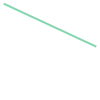

In [68]:
# Demonstrate the usage of the function:

# Create a line with two points: Point(45.2, 22.34) & Point(100.22, -3.20)
create_line_geom( [ (45.2, 22.34),(100.22, -3.20) ] )


3: Create a function called **`create_poly_geom()`** that has one parameter called **`coords`**. `coords` parameter contain a list of Shapely Point objects. The function should create and return a Polygon object of the input data.  

  - Inside the function, you should first check with `assert` -functionality that the input is a **list** (see [lesson 6](https://geo-python.github.io/2018/lessons/L6/interpreting-errors.html#assertions) and [hints](https://automating-gis-processes.github.io/2018/lessons/L1/exercise-1.html#hints)). If something else than a list is passed for the function, you should return an Error message: `"Input should be a list!"`
  - You should also check with `assert` that the input list contains **at least** three values. If not, return an Error message: `"Polygon object requires at least three Points!"`
  - Optional: Finally, you should check with assert that all values in the input list are Shapely Points or tuples. If not, return an Error message: "All list values should be Shapely Point objects!"
  

In [76]:
# define a function
def create_poly_geom(coords):
    '''
    This function is used to create geometry polygon
    input
    points: geomatry points
    ----------------------------
    output 
    Polygon
    '''
    assert type(coords) in [list], "Input should be a list!"
    assert len(coords) > 2,"Polygon object requires at least three Points!"
    for p in coords:
        assert (type(create_point_geom(p[0],p[1]))==Point),"All list values should be Shapely Point objects!"
    return Polygon(coords)

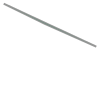

In [75]:
# Demonstrate the usage of the function:

# Create a Polygon with three points: Point(45.2, 22.34) & Point(100.22, -3.20) & Point(70.0, 10.20)
create_poly_geom( [ (45.2, 22.34),(100.22, -3.20),(70.0, 10.20) ] )


- Upload the codes and edits to your **own** personal GitHub repository for Exercise-1 in AutoGIS-2018.

## Done!

That's it. Now you are ready to continue with Problem 2. 

## Problem 2: Attributes of geometries (*5 points*)

1: Create a function called `get_centroid()` that has one parameter called `geom`. The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry. In addition, you should take care that the function is used as it should:

  - Inside the function, you should first check with `assert` -functionality that the input is a Shapely Point, LineString or Polygon geometry (see [lesson 6](https://geo-python.github.io/2018/lessons/L6/interpreting-errors.html#assertions) and [hints](https://automating-gis-processes.github.io/2018/lessons/L1/exercise-1.html#hints)). If something else than a list is passed for the function, you should return an Error message: `"Input should be a Shapely geometry!"`


In [81]:
# define a function
def get_centroid(geom):
    '''
    This function is used to get the centroid of a geometry
    input
    geo
    ----------------------------
    output
    a centroid of geom
    '''
    assert type(geom) in [Point,LineString,Polygon],"Input should be a Shapely geometry!"
    return geom.centroid   

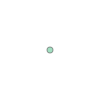

In [82]:
# Demonstrate the usage of the function - You can take advantage of the 'create_line_geom' -function:

# Create a line with two points: Point(45.2, 22.34) & Point(100.22, -3.20)
myline = create_line_geom( [(45.2, 22.34),(100.22, -3.20)] )

# What is the centroid of this line? Print the answer below by using the 'get_centroid' -function:
get_centroid(myline)

2: Create a function called `get_area()` with one parameter called `polygon`. Function should take a Shapely's Polygon -object as input and returns the area of that geometry. 
   
   - Inside the function, you should first check with `assert` -functionality that the input is a Shapely Polygon geometry (see [lesson 6](https://geo-python.github.io/2018/lessons/L6/interpreting-errors.html#assertions) and [hints](https://automating-gis-processes.github.io/2018/lessons/L1/exercise-1.html#hints)). If something else than a list is passed for the function, you should return an Error message: `"Input should be a Shapely Polygon -object!"`

In [87]:
# define a function
def get_area(polygon):
    '''
    This function is used to get the area of a geometry
    input
    polygon
    ----------------------------
    output
    the area of geom
    '''
    assert type(polygon) in [Polygon],"Input should be a Shapely Polygon -object!"
    return polygon.area

In [90]:
# Demonstrate the usage of the function 

# Create a Polygon with three points: Point(45.2, 22.34) & Point(100.22, -3.20) & Point(70.0, 10.20)
# You can take advantage of the 'create_poly_geom' -function:
mypoly = create_poly_geom( [(45.2, 22.34),(100.22, -3.20),(70.0, 10.20)] )

# What is the area of this Polygon? Print the answer below by using the 'get_area' -function:
print('The area of this Polygon is ', get_area(mypoly))

The area of this Polygon is  17.27539999999999


3: Create a function called `get_length()` with parameter called `geom`. The function should accept either a Shapely LineString or Polygon -object as input. Function should check the type of the input and returns the length of 
the line if input is LineString and length of the exterior ring if input is Polygon. If something else is passed to the function, you should return an `Error` `"'geom' should be either LineString or Polygon!"`. (Use assert functionality). 


In [91]:
# define a function
def get_length(geom):
    '''
    This function is used to get the length of a line or length of the exterior ring pf a polygon
    input
    polygon
    ----------------------------
    output
    the length of geom
    '''
    assert type(geom) in [LineString,Polygon],"'geom' should be either LineString or Polygon!"
    if type(geom) == LineString:
        return geom.length
    else:
        return geom.exterior.length

In [94]:
# Demonstrate the usage of the function 

# Create a Polygon with three points: Point(45.2, 22.34) & Point(100.22, -3.20) & Point(70.0, 10.20)
# You can take advantage of the 'create_poly_geom' -function:
mypoly = create_poly_geom( [(45.2, 22.34),(100.22, -3.20),(70.0, 10.20)] )

# What is the length of this Polygon? Print the answer below by using the 'get_length' -function:
print('The length of this Polygon is ', get_length(mypoly))


The length of this Polygon is  121.32841570092893


- Upload the codes and edits to your **own** personal GitHub repository for Exercise-1 in AutoGIS-2018.

## Done!

That's it. Now you are ready to continue with Problem 3. 